# Capstone Project

The below notebook comprises a comprehensive data cleaning, exploratory data analysis and predictive modelling work flow that predicts whether LendingClub should approve or reject customers loan applications based on their dataset collected between 2007 and 2020. 3 predictive models are created and evaluated, with a final predictive model recommended for classifying loan applications and justified in the business report.

## Preparation

This section is used to import a few key libraries and load the CSV dataset into a pandas dataframe:

In [1]:
import pandas as pd
import numpy as np

python_material_folder_name = "python-material"

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Check if in Google Colab environment
try:
    from google.colab import drive
    # Mount drive
    drive.mount('/content/drive')
    # Set up path to Python material parent folder
    path_python_material = rf"drive/MyDrive/Data Science in Finance/{python_material_folder_name}"
        # If unsure, print current directory path by executing the following in a new cell:
        # !pwd
    IN_COLAB = True

    import os
    import sys

    # Get the current working directory (notebook's directory)
    notebook_dir = f"{path_python_material}/notebooks"
    print(notebook_dir)

    if notebook_dir not in sys.path:
      sys.path.append(notebook_dir)

except:
    IN_COLAB = False
    # If working locally on Jupyter Notebook, parent folder is one folder up (assuming you are using the folder structure shared at the beginning of the course)
    path_python_material = ".."

Mounted at /content/drive
drive/MyDrive/Data Science in Finance/python-material/notebooks


In [2]:
# Load the dataset

df = pd.read_csv(rf"{path_python_material}/data/1-raw/lending-club-2007-2020Q3/Loan_status_2007-2020Q3-100ksample.csv")

# Display the first few rows of the dataset

df.head(5)

,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,B3,driver,10

## Part 1: Data Preparation & Cleaning

Part 1 involved inspecting the loaded data and preparing/cleaning it for the upcoming EDA and modelling stages. The focus was to improve the quality of the data as much as possible so it could be used later on, rather than removing it.

#### *i. Converting data types*

Firstly I inspected the dataframe with a few rows of data to get a view the different features and their values:

In [3]:
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 143 entries, Unnamed: 0.1 to debt_settlement_flag
dtypes: float64(106), int64(3), object(34)
memory usage: 109.1+ MB


,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,B3,driver,10

Next I listed all the features out by their data types to see if anything stood out:

In [4]:
list(df.select_dtypes(['float64']).columns)

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'annual_inc_joint',
 'dti_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeof

In [5]:
list(df.select_dtypes(['int64']).columns)

['Unnamed: 0.1', 'Unnamed: 0', 'id']

In [6]:
list(df.select_dtypes(['object']).columns)

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'verification_status_joint',
 'sec_app_earliest_cr_line',
 'hardship_flag',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_loan_status',
 'debt_settlement_flag']

After inspecting the features and their data types I found a few that would benefit from being assigned a data type that more acurately reflected their values. The below code:

*   Converted the 'term' feature from a string to an int after removing the word "months" so the term could be used in numeric calculations
*   Converted the 'int_rate' feature from a string to a float after removing the % symbol so I could calculate summary statistics on the values
*   Converted the 'revol_util' feature from a string to a float after removing the % symbol so I could calculate summary statistics on the values

In [7]:
# Converting the non-numeric columns appropriately by changing the term and
# int_rate to numeric

df['term'] = df['term'].str.replace(' months', '').astype(int)
df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)
df['revol_util'] = df['revol_util'].str.replace('%', '').astype(float)

In [8]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000.0,4000.0,4000.0,36,13.08,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000.0,24000.0,24000.0,60,9.16,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000.0,5000.0,5000.0,36,10.49,162.49,B,B3,driver,10+ years,MORTGAGE,55000.0,N

### *ii. Removing sparse features*


In [9]:
print(f"The dataset initially has {len(df.columns)} columns.")

The dataset initially has 143 columns.


Due to the amount of features, the complexity of the data and the time required to fully investigate and understand every feature, I decided to drop any features with more than 90% blank values to make the feature list more manageable. In a production environment, I would make sure that I was justified in dropping these features by having conversations with multiple stakeholders including the source data providers, fellow data scientists and project stakeholders to make sure the sparse features being dropped below didn't contain important but infrequently-occuring data which would have been beneficial to keep and potentially further engineer.


In [10]:
# Remove features with >90% blank values

df=df.dropna(axis=1,thresh=len(df)*0.90)

print(f"After removing the features with >90% blank values, \
the dataset now has {len(df.columns)} columns.")

After removing the features with >90% blank values, the dataset now has 93 columns.


### *iii. Handling missing values*

I began by checking the dataframe for missing values and printed the results:

In [11]:
#First check for missing values

print("There are", df.isnull().sum().sum(), "null values across the following \
features:")
print(df.isnull().sum())

There are 103154 null values across the following features:
Unnamed: 0.1                     0
Unnamed: 0                       0
id                               0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     8954
emp_length                    6950
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                          780
zip_code                         0
addr_state                       0
dti                            102
delinq_2yrs                      0
earliest_cr_line              

After highlighting the features containing null values, I isolated the nulls into their own dataframe to inspect them further:

In [12]:
# Isolating and inspecting the remaining missing values

df_null = df[df.isna().any(axis=1)]
df_null = df_null.filter(['dti','tot_coll_amt','tot_cur_bal','total_rev_hi_lim',
 'acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util',
 'mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','num_accts_ever_120_pd',
 'num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl',
 'num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats',
 'num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim',
 'total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit','emp_title',
 'emp_length','title','revol_util','last_pymnt_d','last_credit_pull_d',
 'collections_12_mths_ex_med','chargeoff_within_12_mths','num_tl_120dpd_2m',
 'num_tl_30dpd','num_tl_90g_dpd_24m','pub_rec_bankruptcies','tax_liens',
 'hardship_flag'], axis=1)

df_null.head(5)

,dti,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,emp_title,emp_length,title,revol_util,last_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,pub_rec_bankruptcies,tax_liens,hardship_flag
0,20.25,3832.0,259024.0,2400.0,1.0,64756.0,NaN,NaN,179.0,75.0,38.0,16.0,2.0,NaN,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,75.0,NaN,395328.0,11948.0,0.0,17928.0,cashier,10+ years,Home improvement,82.8,May-2020,May-2020,1.0,0.0,0.0,0.0,0.0,1.0,0.0,N
3,24.55,0.0,104590.0,54500.0,4.0,6973.0,43140.0,12.0,37.0,132.0,1.0,1.0,2.0,1.0,1.0,6.0,7.0,11.0,16.0,2.0,13.0,19.0,7.0,15.0,2.0,95.7,0.0,202606.0,18520.0,49000.0,20000.0,NaN,NaN,Debt consolidation,12.1,May-2020,May-2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
6,10.58,0.0,70443.0,16050.0,10.0,5418.0,1625.0,40.0,152.0,145.0,3.0,3.0,1.0,3.0,0.0,4.0,12.0,7.0,16.0,2.0,12.0,32.0,6.0,13.0,5.0,69.0,0.0,84782.0,3466.0,6500.0,0.0,CDC lll,6 years,Home improvement,22.0,Jul-2015,May-2019,0.0,0.0,NaN,0.0,0.0,1.0,0.0,N
8,14.03,0.0,152007.0,23700.0,6.0,21715.0,18640.0,13.3,125.0,230.0,12.0,12.0,1.0,14.0,0.0,2.0,2.0,4.0,6.0,4.0,5.0,16.0,2.0,7.0,2.0,100.0,0.0,184776.0,8210.0,21500.0,8000.0,NaN,NaN,Debt consolidation,12.1,May-2020,May-2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y
10,26.05,0.0,342346.0,61600.0,5.0,28529.0,5367.0,88.5,140.0,240.0,18.0,7.0,2.0,18.0,0.0,5.0,8.0,6.0,10.0,10.0,9.0,16.0,8.0,12.0,2.0,96.4,83.3,371315.0,77819.0,46500.0,41604.0,BILLING SPECIALIST,6 years,Debt consolidation,89.4,May-2020,May-2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


After consulting the data dictionary, I decided to fill the first group of columns with 0's as I believe the missing values represent amounts or events where no data means 0. In a real scenario, I would check this with the data owners to make sure this was the case before applying such transformations, however in this scenario I believe it's a reasonable inference:


In [13]:
fill_zero_cols = [
 'dti','tot_coll_amt','tot_cur_bal', 'acc_open_past_24mths',
 'num_accts_ever_120_pd', 'num_actv_bc_tl','num_actv_rev_tl','num_bc_sats',
 'num_bc_tl','num_il_tl', 'num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0',
 'num_sats', 'num_tl_op_past_12m','revol_util'
 ]

df[fill_zero_cols] = df[fill_zero_cols].fillna(0)

For the below features, I've chosen to impute the missing values with the mean as they're not event or customer-specific. I also know they're all numeric features due to the previous initial data type exploration, so using the mean is both feasible as well as appropriate in this scenario:


In [14]:
fill_median_cols = [
 'bc_util','avg_cur_bal','bc_open_to_buy','mort_acc','pct_tl_nvr_dlq',
 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
 'total_il_high_credit_limit', 'mo_sin_old_il_acct','mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl','mths_since_recent_bc',
 'total_rev_hi_lim'
]

df[fill_median_cols] = df[fill_median_cols].apply(lambda x: x.fillna(x.median()))

With the next set of string features, I chose to impute the missing data with the text 'missing', to clearly identify the missing values and allow for summary tables/visualisations to be created and calculated without the error that blank/missing values can sometimes trigger:

In [15]:
fill_text_cols = [
 'emp_title','emp_length','title','collections_12_mths_ex_med',
 'chargeoff_within_12_mths','num_tl_120dpd_2m',
 'num_tl_30dpd','num_tl_90g_dpd_24m','pub_rec_bankruptcies','tax_liens',
 ]

df[fill_text_cols] = df[fill_text_cols].fillna('missing')

The below two features were handled differently than the others as I believe this was the most effective way to impute these values. I chose to use the 'issued' data as the value for both 'last_pymnt_date' and 'last_credit_pull_date' because the assumption is the data could have been pulled fairly recently after the issue date and the customer hasn't had a first payment or credit pull date yet. Therefore, these two features are now using the 'issued' date to reflect their values:

In [16]:
df.last_pymnt_d.fillna(df.issue_d, inplace=True)
df.last_credit_pull_d.fillna(df.issue_d, inplace=True)

<ipython-input-16-c3bcc8e74816>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.last_pymnt_d.fillna(df.issue_d, inplace=True)
<ipython-input-16-c3bcc8e74816>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Finally the 'hardship_flag' feature contained boolean 'Y' and 'N' values, so I imputed the missing data with 'N's with the assumption of the missing values represented occurences where the flag had not occurred:

In [17]:
fill_hardship_col = ['hardship_flag']

df[fill_hardship_col] = df[fill_hardship_col].fillna('N')

In [18]:
#Second check for missing values
print("There are", df.isnull().sum().sum(), "remaining null values")

There are 0 remaining null values


### *iv. Infinite value check*

As part of the preparation process I included an infinite values check as infinite values can cause errors with the machine learning modelling/algorithm implementation stage:

In [19]:
# Creating a function to check for infinity values
def check_infinity(df):
    infinite_list = df.isin([-np.inf, np.inf]).sum()

    if infinite_list.sum() == 0:
        print("No column has infinite values")
    else:
        print("Columns with infinite values:")
        print(infinite_list[infinite_list>0])

check_infinity(df)

No column has infinite values


In this scenario I didn't find any, however if I did I would have used similar techniques to those used in the 'iii. Handling missing values' section to remove the infinite values and replace them with appropriate values instead.

## Part 2: Exploratory Data Analysis

### *i. Feature engineering*

#### *a. Define target variable*

Before we start exploring the data, the target variable needs to be created so it can be used as a centre point for the upcoming analysis, modelling and discussion. In this scenario, the target variable will be whether a loan has defaulted or not, represented by the 'charged off' status.

I've chosen to use this as my target variable as the project overview states Lending Club is looking to build a model for classifying loan applications. By using 'charged off' as the target variable, the business would want to avoid issuing loans to these types of customers as they were unable to pay them back, costing the business time and money. The other loan statuses (whilst not all ideal) represent scenarios where the business would be happy to loan individuals the money, and therefore by creating this target varaible sets up a classification problem for our machine learning model.

As the table below shows, there is an ok representation (just over 12%) of "charged off" loan statuses within the dataset, making it a feasible target for the machine learning models:

In [20]:
# View the unique loan statuses

df.loan_status.value_counts()

,count
loan_status,
Fully Paid,51189
Current,35294
Charged Off,12384
Late (31-120 days),535
In Grace Period,329
Late (16-30 days),90
Does not meet the credit policy. Status:Fully Paid,69
Issued,63
Does not meet the credit policy. Status:Charged Off,33


To create the variable I'm creating a new feature based on the "charged off" value in the "loan_status" feature, which will return a true or false value:

In [21]:
# Create the target variable

df['loan_default'] = df.loan_status == "Charged Off"
df['loan_default'].value_counts()

,count
loan_default,
False,87616
True,12384


#### *b. New date features*

The first new features I created were around dates present in the dataset. This would assist in the EDA as it would allow for time series/time specific investiations to occur and I achieved these transformations through converting existing dates to datetimes and formatting them in my desired display format:


In [22]:
df['earliest_cr_line_dt'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')
df['last_pymnt_d_dt'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%Y')
df['last_credit_pull_d_dt'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%Y')
df['issued_dt'] = pd.to_datetime(df['issue_d'], format='%b-%Y')

df['issued_month'] = df['issued_dt'].apply(lambda t: t.month)
df['issued_year'] = df['issued_dt'].apply(lambda t: t.year)

#### *c. New income bands*

I also created a feature based on the different income bands, grouping certain ranges together which allowed me to transform a numeric feature into a categorical one and reduce the range of values that the feature initially had, which could have been noisy for the machine learning models due to its large range.

This feature was created after the section 'ii. Distribution & Symmetry' and reviewing the features values, however for the structure of this notebook and trying to avoid having numerous feature engineering sections, I've included the code in the preceding section to its identification.

In [23]:
def income_bands(num):
    if num <= 47500:
        num = "Band 1"
    elif num > 47500 and num <= 55000:
        num = "Band 2"
    elif num > 55000 and num <= 65000:
        num = "Band 3"
    elif num > 65000 and num <= 75000:
        num = "Band 4"
    elif num > 75000 and num <= 85000:
        num = "Band 5"
    elif num > 85000 and num <= 95000:
        num = "Band 6"
    elif num > 95000:
        num = "Band 7"
    return num

df['income_bands'] = df['annual_inc'].apply(income_bands)

###  *ii. Distribution & Symmetry*

Firstly, I began by creating a summary table of all the numeric features showing their distribution statistics such as mean, min and max values to get an idea whether there were any themes, outliers and patterns:

In [24]:
# Descriptive statistics of the numeric columns

print("\nDescriptive Statistics:")
df.describe().apply(lambda x: x.apply('{0:.2f}'.format))


Descriptive Statistics:


,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,earliest_cr_line_dt,last_pymnt_d_dt,last_credit_pull_d_dt,issued_dt,issued_month,issued_year
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,1462097.51,86737.79,97894846.43,15332.37,15328.22,15313.24,43.11,13.06,451.71,80029.18,19.31,0.28,700.64,704.64,0.55,11.69,0.18,16893.49,48.85,24.04,4032.02,4031.44,12559.49,12544.53,9911.41,2479.31,1.75,167.02,28.61,3512.91,690.48,677.66,1.00,0.00,202.98,142368.70,36163.94,4.43,13603.62,12593.66,55.88,10.71,125.98,179.51,14.33,8.27,1.50,24.79,0.47,3.61,5.46,4.76,7.45,8.35,8.06,13.45,5.42,11.46,2.03,94.49,39.86,182248.84,52545.44,24704.07,45331.97,.2f,.2f,.2f,.2f,6.56,2016.62
min,12.00,1.00,56413.00,700.00,700.00,0.00,36.00,5.31,22.51,0.00,-1.00,0.00,640.00,644.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-753.18,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,.2f,.2f,.2f,.2f,1.00,2007.00
25%,731812.50,32518.00,59070843.25,8000.00,8000.00,8000.00,36.00,9.17,253.06,47160.50,12.04,0.00,675.00,679.00,0.00,8.00,0.00,5973.75,29.50,15.00,0.00,0.00,4744.56,4732.01,3113.81,724.00,0.00,0.00,0.00,264.60,654.00,650.00,1.00,0.00,0.00,27733.00,15600.00,2.00,3194.00,2085.00,33.50,0.00,96.00,113.00,4.00,3.00,0.00,6.00,0.00,2.00,3.00,3.00,4.00,3.00,5.00,8.00,3.00,7.00,1.00,92.00,0.00,53922.75,21663.00,9000.00,16000.00,.2f,.2f,.2f,.2f,4.00,2015.00
50%,1461461.00,68626.00,107808290.50,13000.00,13000.00,13000.00,36.00,12.49,380.81,66000.00,18.09,0.00,695.00,699.00,0.00,11.00,0.00,11465.00,48.40,22.00,0.00,0.00,9767.65,9751.74,7415.48,1537.72,0.00,0.00,0.00,584.09,704.00,700.00,1.00,0.00,0.00,76090.50,26800.00,4.00,7461.50,6262.50,57.30,0.00,130.00,162.00,9.00,6.00,1.00,14.00,0.00,3.00,5.00,4.00,7.00,6.00,7.00,12.00,5.00,11.00,2.00,100.00,33.30,118273.50,38952.00,17500.00,34083.00,.2f,.2f,.2f,.2f,7.00,2017.00
75%,2188598.75,107111.00,143359217.75,20000.00,20000.00,20000.00,60.00,16.01,602.30,95000.00,24.87,0.00,720.00,724.00,1.00,15.00,0.00,20566.25,68.00,31.00,5315.21,5314.93,17567.37,17540.21,14500.00,3175.68,0.00,0.00,0.00,3979.38,739.00,735.00,1.00,0.00,0.00,214206.00,45000.00,6.00,18730.50,15720.25,80.50,0.00,153.00,228.00,18.00,10.00,2.00,30.00,0.00,5.00,7.00,6.00,10.00,11.00,10.00,18.00,7.00,14.00,3.00,100.00,66.70,261238.75,65758.50,32100.00,60212.25,.2f,.2f,.2f,.2f,10.00,2018.00
m

One thing that stood out immediately was the wide range of income values, which is why I created the new 'income bands' feature documented in the previous section.

Other areas of interest included the loan amount, the loan reasons ('titles') and the amount of defaults based on other variables. I wanted to use the EDA section to get a deeper understanding of the loan application profiles in these areas and communicate them through visual aids.

Firstly I added a temporary 'count' feature that would be used to sum up values and assist with the graph creations:

In [25]:
df['Count']=1

Next I created a histogram on the distribution of the 'loan_amnt' feature. This was to help build a picture with regards to how much customers were looking to borrow in their applications and the distribution between the minimum and maximum values:

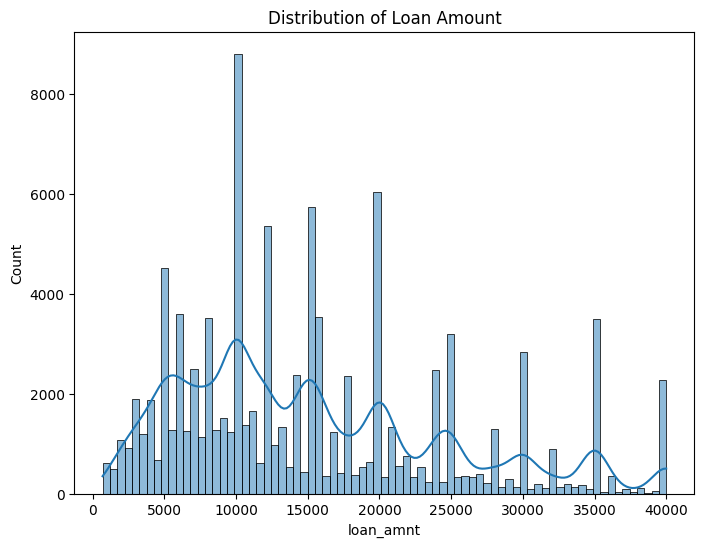

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Loan Amount
plt.figure(figsize=(8, 6))
sns.histplot(df['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amount')
plt.show()

The results showed that the most common loan amount value was around 10,000, with key spikes at around every 5k interval. This shows that the most common requested loan amounts are in multiples of 5k, especialy after the 10,000 amount. This is useful in understanding the amount of risk that the business is most commonly exposing by loaning customers these amounts and also can help calculate potential ROI's and impacts as demonstrated later on.

The next visual created as part of the EDA focused on the reasons for the loan applications and whether the business would want to approve them (false) or not (true). As there were many different reasons for loan applications, I filtered to the top 10 by a count, to see the most popular:

In [27]:
import plotly.express as px

df_t = df[['title','loan_default','Count']]
df_t['loan_default'] = df_t['loan_default'].astype(str)

dfmo=df_t.groupby(['title','loan_default']).sum().reset_index()

dfmo = dfmo.nlargest(10, 'Count')

#Accuracy interactive bar chart
month_fig = px.bar(dfmo, x='title', y='Count',
                   barmode="group",
                   color = 'loan_default',
                   text_auto="y",
                   color_discrete_sequence=["orange","blue"]
                   )
month_fig.update_layout(title='Count of Loans Per Title with Approved Split')
month_fig.update_xaxes(categoryorder='array', categoryarray= ['TRUE','FALSE'])
month_fig.show();

<ipython-input-27-e846056133ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t['loan_default'] = df_t['loan_default'].astype(str)


The results show that of the top 10 loan reasons, only the top 2 have applications that have been denied. This gives the business an immediate indication of loan areas they may want to look into in more detail, to understand the intricacies of the loan approval process in these areas and draw out common themes about why loans are rejected. Further scrutiny could be applied when potential customers are requesting loans for these highlighted reasons as to make sure they can pay them back and won't end up defaulting, costing the business time and money.

Finally the third visual uses the newly-created 'income bands' feature and builds on it by showing the amount of rejected loan applications by each band. The idea for this piece of EDA was driven by the desire to flag income bands that have loan applications rejected more than others, as this could be used as the basis for further EDA by the business to find other commonalities/differences within the band itself and create more features that could be useful to a machine learning model.

In [28]:
df_defaulted = df.loc[df['loan_default'] == True]

v1 = df_defaulted.groupby(['income_bands']).count().reset_index()

# Plot structure

day_fig = px.bar(v1, x='income_bands', y='loan_default',
                barmode="group", text_auto="y")
day_fig.update_layout(title='Loan Application Rejections per Income Band')

# Show plot

day_fig.show()

The results show that the split is fairly consistent across bands 2 to 5 and band 6 has the lowest by a fairly considerable margin, however bands 1 and 7, which are the lowest and highest income bands respectively, have the most defaults. This is interesting as band 1 might have been expected with regards to potential links between having a low income and not being able to afford repayments etc. and therefore loan applications being rejected, however band 7 showing a high number of rejections might be less expected and provide a platform for further EDA to occur. Band 7 could be combined with the second piece of EDA and looked at by title to see what reasons they're providing for their loans and whether there's any common themes regarding their rejections.

### *iii. Outliers*

When looking at the distribution statistics, some features look like they might have outliers in them. For example, the annual_inc feature has a mean of ~80k, but a maximum value of 10,999,200. Therefore the dataset (and resulting analysis/modelling) could benefit from checking to see whether there are outliers and if so, how many and see if they should be removed. I chose a few key features to investigate, including features flagged in the distribution table as having a very wide or varied set of statistics and also using the data dictionary to manually identify potentially-key variables to test:

In [29]:
from scipy import stats

# Calculate the Z-score for loan_amnt and annual_inc

df['loan_amnt_zscore'] = np.abs(stats.zscore(df['loan_amnt']))
df['annual_inc_zscore'] = np.abs(stats.zscore(df['annual_inc']))
df['total_acc_zscore'] = np.abs(stats.zscore(df['total_acc']))

# Flag outliers (Z-score > 3)

outliers_la = df[df['loan_amnt_zscore'] > 3]
outliers_ai = df[df['annual_inc_zscore'] > 3]
outliers_tc = df[df['total_acc_zscore'] > 3]

print(f"loan_amnt outliers detected using z-scores: {len(outliers_la)}")
print(f"annual_inc outliers detected using z-scores: {len(outliers_ai)}")
print(f"total_acc outliers detected using z-scores: {len(outliers_tc)}")

loan_amnt outliers detected using z-scores: 0
annual_inc outliers detected using z-scores: 567
total_acc outliers detected using z-scores: 998


With a notable amount of outliers detected in the loan amount, annual income and total account balance features, I decided to remove these so they didn't negatively affect the training of the predictive models further down the line:

In [30]:
df = df[(np.abs(stats.zscore(df[['annual_inc_zscore','total_acc_zscore']])) < 3)
                                .all(axis=1)]

### *iv. Feature reduction*

The feature reduction section comprises of three main focuses: removing redundant features, removing numeric features and removing non-numeric features that don't contribute significant meaningful information to the target variable.

#### *a. Redundant features*

Firstly, a selection of features are removed due to the information not being available at the time of predictions (i.e the time of the loan applications) including total payment amounts, funded amounts etc.

Also the 'id' column does not provide any relevance to the target variable and the two 'unnamed' columns are unclear in the data they're providing. In a real scenario, I would investigate this at the data's source to understand what information the two 'unnamed' features were supposed to be conveying, but in this scenario I will drop these columns too as their purpose is unclear and undocumented in the data dictionary:

In [31]:
# Drop the now-redundant columns to reduce dimensionality

df = df.drop(columns = ["out_prncp",
                             "out_prncp_inv",
                             "total_pymnt",
                             "total_pymnt_inv",
                             "funded_amnt",
                             "funded_amnt_inv",
                             "id",
                             "Unnamed: 0",
                             "Unnamed: 0.1",
                             "Count",
                             "annual_inc",
                             "loan_amnt_zscore",
                             "annual_inc_zscore",
                             "total_acc_zscore"]
                            )

print(f"The revised dataset currently has {len(df.columns)} columns.")

The revised dataset currently has 91 columns.


Next I split the dataset in two, to decide which numeric features and which non-numeric features I'd like to include. By splitting them and reviewing them seperately, it allowed me to examine both types of features in more depth and use different techniques on both:

In [32]:
from sklearn.feature_selection import VarianceThreshold

df_numeric = df.select_dtypes(include=['number'])
df_non_numeric = df.select_dtypes(exclude=['number'])

print(f"There are currently {len(df_numeric.columns)} numeric features.")
print(f"There are currently {len(df_non_numeric.columns)} non-numeric features.")

There are currently 57 numeric features.
There are currently 34 non-numeric features.


####  *b. Numeric features*

For the numeric features I used a variance detector to remove numeric features that have less than 0.5 variance between all their values, as features with a higher variance can often improve the models predictive performance as it tells it more information than a feature with little to no variance. With more time this could be iterated on to increase/decrease the threshold and trialled including different features:

In [33]:
def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(df_numeric)
    return data[data.columns[selector.get_support(indices=True)]]

df_numeric = variance_threshold_selector(df_numeric, 0.5)

print(f"The numeric dataset post-variance threshold selector has \
{len(df_numeric.columns)} columns we want to use:")
list(df_numeric)

The numeric dataset post-variance threshold selector has 54 columns we want to use:


['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'issued_month',
 'issued_y

#### *c. Non-numeric features*

For the non-numeric features, I began by identifying them by their data type:

In [34]:
# Starting non-numeric features

print(f"The non-numeric dataset starts with {len(df_non_numeric.columns)} columns:")
list(df_non_numeric)

The non-numeric dataset starts with 34 columns:


['grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'application_type',
 'chargeoff_within_12_mths',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'pub_rec_bankruptcies',
 'tax_liens',
 'hardship_flag',
 'debt_settlement_flag',
 'loan_default',
 'earliest_cr_line_dt',
 'last_pymnt_d_dt',
 'last_credit_pull_d_dt',
 'issued_dt',
 'income_bands']

Next I examined a sample of values to decide which are important and how we could handle them in the models:

In [35]:
df_non_numeric.head(10)

,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,chargeoff_within_12_mths,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag,loan_default,earliest_cr_line_dt,last_pymnt_d_dt,last_credit_pull_d_dt,issued_dt,income_bands
0,B,B5,cashier,10+ years,MORTGAGE,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,Dec-2004,w,May-2020,May-2020,1.0,Individual,0.0,0.0,0.0,0.0,1.0,0.0,N,N,False,2004-12-01,2020-05-01,2020-05-01,2020-03-01,Band 2
1,B,B2,ABM,6 years,RENT,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,Jan-2004,w,May-2020,May-2020,0.0,Individual,0.0,0.0,0.0,0.0,0.0,0.0,N,N,False,2004-01-01,2020-05-01,2020-05-01,2016-02-01,Band 3
2,B,B3,driver,10+ years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,347xx,FL,Apr-2010,f,Jan-2018,May-2020,0.0,Individual,0.0,0.0,0.0,0.0,0.0,1.0,N,N,False,2010-04-01,2018-01-01,2020-05-01,2015-01-01,Band 2
3,B,B4,missing,missing,MORTGAGE,Not Verified,Jun-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,443xx,OH,Oct-2005,w,May-2020,May-2020,0.0,Individual,0.0,0.0,0.0,0.0,0.0,0.0,N,N,False,2005-10-01,2020-05-01,2020-05-01,2018-06-01,Band 1
4,C,C2,Shipping Clerk,10+ years,MORTGAGE,Source Verified,Jan-2018,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,681xx,NE,Apr-2008,w,Jul-2019,Feb-2020,0.0,Individual,0.0,0.0,0.0,0.0,0.0,0.0,N,N,False,2008-04-01,2019-07-01,2020-02-01,2018-01-01,Band 2
5,B,B5,CSR,10+ years,RENT,Verified,Nov-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,moving,Moving and relocation,940xx,CA,Jul-2004,w,Apr-2018,Oct-2018,0.0,Individual,0.0,0.0,0.0,0.0,1.0,0.0,N,N,True,2004-07-01,2018-04-01,2018-10-01,2015-11-01,Band 1
6,C,C1,CDC lll,6 years,MORTGAGE,Not Verified,Jan-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,142xx,NY,May-2001,f,Jul-2015,May-2019,0.0,Individual,0.0,missing,0.0,0.0,1.0,0.0,N,N,False,2001-05-01,2015-07-01,2019-05-01,2014-01-01,Band 1
7,D,D2,Snr Scientist,2 years,RENT,Not Verified,Mar-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,761xx,TX,Jun-1995,w,Oct-2018,Dec-2018,0.0,Individual,0.0,0.0,0.0,0.0,0.0,0.0,N,N,False,1995-06-01,2018-10-01,2018-12-01,2016-03-01,Band 7
8,B,B3,missing,missing,MORTGAGE,Verified,Mar-2020,Issued,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,335xx,FL,Jan-2001,w,May-2020,May-2020,0.0,Individual,0.0,0.0,0.0,0.0,0.0,0.0,Y,N,False,2001-01-01,2020-05-01,2020-05-01,2020-03-01,Band 1
9,A,A4,Pharmacist,4 years,RENT,Not Verified,May-2019,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,109xx,NY,Mar-2007,w,May-2020,May-2020,0.0,Individual,0.0,0.0,0.0,0.0,0.0,0.0,N,N,False,2007-03-01,2020-05-01,2020-05-01,2019-05-01,Band 7


After using the data dictionary and examining some of the sample values above,
I isolated the features I'd like to include at this stage. This included dropping features that could have lead to data leakage such as last_pymnt_d and loan_status, which could have given the upcoming machine learning algorithms an unfair advantage when training:


In [36]:
n_n_features = ['grade', 'home_ownership','application_type','income_bands',
                'loan_default']

df_non_numeric = df_non_numeric[n_n_features]

df_non_numeric.head(10)

,grade,home_ownership,application_type,income_bands,loan_default
0,B,MORTGAGE,Individual,Band 2,False
1,B,RENT,Individual,Band 3,False
2,B,MORTGAGE,Individual,Band 2,False
3,B,MORTGAGE,Individual,Band 1,False
4,C,MORTGAGE,Individual,Band 2,False
5,B,RENT,Individual,Band 1,True
6,C,MORTGAGE,Individual,Band 1,False
7,D,RENT,Individual,Band 7,False
8,B,MORTGAGE,Individual,Band 1,False
9,A,RENT,Individual,Band 7,False


The last step taken was to filter the dataframe by my final list of chosen features after the techniques applied above:

In [37]:
# Time to filter the original dateframe with my final selected features

features = ['loan_amnt','term','int_rate','installment','dti','delinq_2yrs',
            'fico_range_low','fico_range_high','inq_last_6mths','open_acc',
            'revol_bal','revol_util','total_acc','total_rec_prncp',
            'total_rec_int','total_rec_late_fee','recoveries',
            'collection_recovery_fee','last_pymnt_amnt','last_fico_range_high',
            'last_fico_range_low','tot_coll_amt','tot_cur_bal',
            'total_rev_hi_lim','acc_open_past_24mths','avg_cur_bal',
            'bc_open_to_buy','bc_util','delinq_amnt','mo_sin_old_il_acct',
            'mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl',
            'mort_acc','mths_since_recent_bc','num_accts_ever_120_pd',
            'num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl',
            'num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0',
            'num_sats','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75',
            'tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit',
            'total_il_high_credit_limit','issued_month','issued_year','grade',
            'home_ownership','application_type','income_bands','loan_default']

df = df[features]

df.head(5)

,loan_amnt,term,int_rate,installment,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,issued_month,issued_year,grade,home_ownership,application_type,income_bands,loan_default
0,4000.0,36,13.08,134.93,20.25,1.0,665.0,669.0,0.0,4.0,1988.0,82.8,12.0,183.66,83.29,0.0,0.0,0.0,134.93,669.0,665.0,3832.0,259024.0,2400.0,1.0,64756.0,6262.5,57.3,0.0,179.0,75.0,38.0,16.0,2.0,14.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,75.0,33.3,395328.0,11948.0,0.0,17928.0,3,2020,B,MORTGAGE,Individual,Band 2,False
1,24000.0,60,9.16,500.07,25.33,0.0,680.0,684.0,0.0,10.0,22697.0,64.5,24.0,19666.71,5829.45,0.0,0.0,0.0,500.07,704.0,700.0,0.0,61815.0,35200.0,4.0,6182.0,7741.0,40.5,0.0,145.0,137.0,7.0,7.0,0.0,7.0,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,1.0,95.8,60.0,88154.0,61815.0,13000.0,52954.0,2,2016,B,RENT,Individual,Band 3,False
2,5000.0,36,10.49,162.49,7.22,0.0,665.0,669.0,0.0,7.0,6001.0,52.6,9.0,5000.00,846.67,0.0,0.0,0.0,162.43,789.0,785.0,0.0,159131.0,11400.0,4.0,22733.0,4521.0,54.8,0.0,57.0,57.0,14.0,9.0,1.0,14.0,0.0,3.0,5.0,3.0,3.0,2.0,5.0,6.0,5.0,7.0,1.0,100.0,33.3,171118.0,13124.0,10000.0,7526.0,1,2015,B,MORTGAGE,Individual,Band 2,False
3,24000.0,60,11.05,522.42,24.55,0.0,750.0,754.0,0.0,15.0,6573.0,12.1,23.0,7682.31,4318.62,0.0,0.0,0.0,522.42,749.0,745.0,0.0,104590.0,54500.0,4.0,6973.0,43140.0,12.0,0.0,37.0,132.0,1.0,1.0,2.0,1.0,1.0,6.0,7.0,11.0,16.0,2.0,13.0,19.0,7.0,15.0,2.0,95.7,0.0,202606.0,18520.0,49000.0,20000.0,6,2018,B,MORTGAGE,Individual,Band 1,False
4,14000.0,60,13.59,322.79,24.30,0.0,735.0,739.0,1.0,16.0,11894.0,27.1,23.0,14000.00,2605.68,0.0,0.0,0.0,11128.82,779.0,775.0,0.0,90253.0,43900.0,5.0,5641.0,17318.0,39.9,0.0,72.0,117.0,6.0,6.0,2.0,6.0,0.0,4.0,5.0,5.0,6.0,5.0,13.0,16.0,5.0,16.0,4.0,100.0,0.0,152081.0,34847.0,28800.0,38181.0,1,2018,C,MORTGAGE,Individual,Band 2,False


## Part 3: Modelling

### *i. Encoding*

For the first encoding step I applied one hot encoding to the text features that have values with no relation to each other. One hot encoding adds a new feature for every value within the original feature, with either a numerical value of 1 for when the value is present and a 0 when it's absent. This allows the previously-text values to be processed by an ML model in a numerical format, with the information the original text value contained to be used and interpreted rather than dropped. In this scenario, I had 2 columns I wanted to encode:

In [38]:
df = pd.get_dummies(df, columns=['home_ownership','application_type'],
                    dtype=int)

Next I label encoded the ordinal features which are the 'grade' and 'income bands' features. They have an order as the values signify a heirarchy to each other, e.g. the higher the income band number, the more income those individuals receive vs. those in a lower income band number. The heirarchy is important to help the machine learning algorithm detect any potential hidden patterns or associations between the different levels of heirarchy and other features, which is why I label encoded them rather than one hot encoded:

In [39]:
from sklearn import preprocessing

le_bands= preprocessing.LabelEncoder()
le_grade = preprocessing.LabelEncoder()

df['income_bands'] = le_bands.fit_transform(list(df['income_bands']))
df['grade'] = le_grade.fit_transform(list(df['grade']))

The third and final step of encoding is I replaced the target variables text values of TRUE and FALSE with numerical values of 1's and 0's respectively, so they can be interpreted by the machine learning algorithms:

In [40]:
# Replace true and false values in target variable with 1 and 0 respectively

df['loan_default'] = df['loan_default'].astype(int)
df.head(10)

,loan_amnt,term,int_rate,installment,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,issued_month,issued_year,grade,income_bands,loan_default,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_Individual,application_type_Joint App
0,4000.0,36,13.08,134.93,20.25,1.0,665.0,669.0,0.0,4.0,1988.0,82.8,12.0,183.66,83.29,0.00,0.00,0.000,134.93,669.0,665.0,3832.0,259024.0,2400.0,1.0,64756.0,6262.5,57.3,0.0,179.0,75.0,38.0,16.0,2.0,14.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,75.0,33.3,395328.0,11948.0,0.0,17928.0,3,2020,1,1,0,0,1,0,0,0,0,1,0
1,24000.0,60,9.16,500.07,25.33,0.0,680.0,684.0,0.0,10.0,22697.0,64.5,24.0,19666.71,5829.45,0.00,0.00,0.000,500.07,704.0,700.0,0.0,61815.0,35200.0,4.0,6182.0,7741.0,40.5,0.0,145.0,137.0,7.0,7.0,0.0,7.0,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,1.0,95.8,60.0,88154.0,61815.0,13000.0,52954.0,2,2016,1,2,0,0,0,0,0,0,1,1,0
2,5000.0,36,10.49,162.49,7.22,0.0,665.0,669.0,0.0,7.0,6001.0,52.6,9.0,5000.00,846.67,0.00,0.00,0.000,162.43,789.0,785.0,0.0,159131.0,11400.0,4.0,22733.0,4521.0,54.8,0.0,57.0,57.0,14.0,9.0,1.0,14.0,0.0,3.0,5.0,3.0,3.0,2.0,5.0,6.0,5.0,7.0,1.0,100.0,33.3,171118.0,13124.0,10000.0,7526.0,1,2015,1,1,0,0,1,0,0,0,0,1,0
3,24000.0,60,11.05,522.42,24.55,0.0,750.0,754.0,0.0,15.0,6573.0,12.1,23.0,7682.31,4318.62,0.00,0.00,0.000,522.42,749.0,745.0,0.0,104590.0,54500.0,4.0,6973.0,43140.0,12.0,0.0,37.0,132.0,1.0,1.0,2.0,1.0,1.0,6.0,7.0,11.0,16.0,2.0,13.0,19.0,7.0,15.0,2.0,95.7,0.0,202606.0,18520.0,49000.0,20000.0,6,2018,1,0,0,0,1,0,0,0,0,1,0
4,14000.0,60,13.59,322.79,24.30,0.0,735.0,739.0,1.0,16.0,11894.0,27.1,23.0,14000.00,2605.68,0.00,0.00,0.000,11128.82,779.0,775.0,0.0,90253.0,43900.0,5.0,5641.0,17318.0,39.9,0.0,72.0,117.0,6.0,6.0,2.0,6.0,0.0,4.0,5.0,5.0,6.0,5.0,13.0,16.0,5.0,16.0,4.0,100.0,0.0,152081.0,34847.0,28800.0,38181.0,1,2018,2,1,0,0,1,0,0,0,0,1,0
5,4000.0,36,11.49,131.89,11.56,0.0,700.0,704.0,0.0,4.0,3556.0,38.7,7.0,3111.33,694.33,0.00,124.65,22.437,131.89,504.0,500.0,0.0,16847.0,9200.0,1.0,4212.0,4381.0,43.1,0.0,136.0,125.0,13.0,13.0,0.0,13.0,0.0,2.0,3.0,2.0,4.0,2.0,3.0,5.0,3.0,4.0,0.0,100.0,0.0,28077.0,16847.0,7700.0,18877.0,11,2015,1,0,1,0,0,0,0,0,1,1,0
6,7200.0,36,13.98,246.01,10.58,0.0,680.0,684.0,1.0,14.0,3466.0,22.0,35.0,7200.00,1226.78,0.00,0.00,0.000,4245.06,724.0,720.0,0.0,70443.0,16050.0,10.0,5418.0,1625.0,40.0,0.0,152.0,145.0,3.0,3.0,1.0,3.0,0.0,4.0,12.0,7.0,16.0,2.0,12.0,32.0,6.0,13.0,5.0,69.0,0.0,84782.0,3466.0,6500.0,0.0,1,2014,2,0,0,0,1,0,0,0,0,1,0
7,19500.0,36,17.27,697.86,16.12,0.0,665.0,669.0,1.0,6.0,3959.0,82.5,19.0,19500.00,5517.01,34.89,0.00,0.000,4755.10,709.0,705.0,0.0,72077.0,4800.0,4.0,12013.0,841.0,82.5,0.0,115.0,249.0,30.0,5.0,2.0,30.0,0.0,2.0,2.0,2.0,4.0,11.0,2.0,6.0,2.0,6.0,2.0,84.2,100.0,77361.0,72077.0,4800.0,72561.0,3,2016,3,6,0,0,0,0,0,0,1,1,0
8,8925.0,36,11.71,295.21,14.03,0.0,790.0,794.0,0.0,7.0,2860.0,12.1,21.0,0.00,0.00,0.00,0.00,0.000,0.00,774.0,770.0,0.0,152007.0,23700.0,6.0,21715.0,18640.0,13.3,0.0,125.0,230.0,12.0,12.0,1.0,14.0,0.0,2.0,2.0,4.0,6.0,4.0,5.0,16.0,2.0,7.0,2.0,100.0,0.0,184776.0,8210.0,21500.0,8000.0,3,2020,1,0,0,0,1,0,0,0,0,1,0
9,38275.0,60,8.19,779.57,27.80,0.0,760.0,764.0,1.0,26.0,13107.0,16.4,45.0,6459.00,2878.42,0.00,0.00,0.000,779.57,664.0,660.0,0.0,248127.0,79700.0,5.0,9

### *ii. Standardising*

I chose to standarise the data as there were numerous different scales of data across the features, for example there was monetary scales in features like 'loan amount' and 'income', whilst there was also percentage scales like the 'interest rate' feature. By standardising and unifying the values onto the same scale, it would provide a better level playing field for the machine learning algorithms to perform their predictions with and theoretically enable more accurate predictions as well:

In [41]:
# First I'll split the data into the X and y format

X = df.drop('loan_default', axis=1)
y = df['loan_default']

final_features = ['loan_amnt','term','int_rate','installment','dti',
                  'delinq_2yrs','fico_range_low','fico_range_high',
                  'inq_last_6mths','open_acc','revol_bal','revol_util',
                  'total_acc','total_rec_prncp','total_rec_int',
                  'total_rec_late_fee','recoveries','collection_recovery_fee',
                  'last_pymnt_amnt','last_fico_range_high','last_fico_range_low',
                  'tot_coll_amt', 'tot_cur_bal','total_rev_hi_lim',
                  'acc_open_past_24mths','avg_cur_bal','bc_open_to_buy',
                  'bc_util','delinq_amnt','mo_sin_old_il_acct',
                  'mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl',
                  'mort_acc','mths_since_recent_bc','num_accts_ever_120_pd',
                  'num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl',
                  'num_il_tl','num_op_rev_tl','num_rev_accts',
                  'num_rev_tl_bal_gt_0','num_sats','num_tl_op_past_12m',
                  'pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim',
                  'total_bal_ex_mort','total_bc_limit',
                  'total_il_high_credit_limit','issued_month','issued_year',
                  'grade','income_bands','home_ownership_ANY',
                  'home_ownership_MORTGAGE','home_ownership_NONE',
                  'home_ownership_OTHER','home_ownership_OWN',
                  'home_ownership_RENT','application_type_Individual',
                  'application_type_Joint App']

print(f"Final number of features: {len(final_features)}")

Final number of features: 64


I used the MinMaxScaler to transform the values as it's a quick and powerful function that can be applied to the dataframe as a whole in one line of code:

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame with same column names

X = pd.DataFrame(X_scaled, columns=final_features)
X.head()

,loan_amnt,term,int_rate,installment,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,issued_month,issued_year,grade,income_bands,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_Individual,application_type_Joint App
0,0.083969,0.0,0.302570,0.066234,0.02125,0.055556,0.121951,0.121359,0.00,0.085106,0.001795,0.473143,0.200000,0.004592,0.002626,0.0,0.0,0.0,0.020990,0.787059,0.786982,0.02264,0.068410,0.001800,0.027778,0.137268,0.015925,0.327429,0.0,0.179179,0.089441,0.102151,0.063745,0.058824,0.021909,0.028571,0.000000,0.054054,0.000000,0.025641,0.098039,0.044444,0.094340,0.052632,0.085106,0.000000,0.722222,0.333,0.096483,0.010274,0.000000,0.017414,0.181818,1.000000,0.166667,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.592875,1.0,0.149922,0.281361,0.02633,0.000000,0.195122,0.194175,0.00,0.212766,0.020488,0.368571,0.418182,0.491668,0.183811,0.0,0.0,0.0,0.029620,0.828235,0.828402,0.00000,0.016326,0.026407,0.111111,0.013104,0.019685,0.231429,0.0,0.145145,0.166460,0.018817,0.027888,0.000000,0.010955,0.000000,0.111111,0.135135,0.142857,0.153846,0.294118,0.155556,0.169811,0.131579,0.212766,0.034483,0.953333,0.600,0.021515,0.053154,0.030577,0.051437,0.090909,0.692308,0.166667,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.109415,0.0,0.201713,0.082471,0.00822,0.000000,0.121951,0.121359,0.00,0.148936,0.005417,0.300571,0.145455,0.125000,0.026697,0.0,0.0,0.0,0.021640,0.928235,0.928994,0.00000,0.042028,0.008552,0.111111,0.048189,0.011497,0.313143,0.0,0.057057,0.067081,0.037634,0.035857,0.029412,0.021909,0.000000,0.111111,0.135135,0.085714,0.076923,0.039216,0.111111,0.113208,0.131579,0.148936,0.034483,1.000000,0.333,0.041763,0.011285,0.023521,0.007310,0.000000,0.615385,0.166667,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.592875,1.0,0.223520,0.294529,0.02555,0.000000,0.536585,0.533981,0.00,0.319149,0.005933,0.069143,0.400000,0.192058,0.136172,0.0,0.0,0.0,0.030149,0.881176,0.881657,0.00000,0.027623,0.040885,0.111111,0.014781,0.109701,0.068571,0.0,0.037037,0.160248,0.002688,0.003984,0.058824,0.001565,0.028571,0.222222,0.189189,0.314286,0.410256,0.039216,0.288889,0.358491,0.184211,0.319149,0.068966,0.952222,0.000,0.049447,0.015925,0.115253,0.019427,0.454545,0.846154,0.166667,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.338422,1.0,0.322430,0.176914,0.02530,0.000000,0.463415,0.461165,0.04,0.340426,0.010737,0.154857,0.400000,0.350000,0.082161,0.0,0.0,0.0,0.280830,0.916471,0.917160,0.00000,0.023837,0.032933,0.138889,0.011958,0.044038,0.228000,0.0,0.072072,0.141615,0.016129,0.023904,0.058824,0.009390,0.000000,0.148148,0.135135,0.142857,0.153846,0.098039,0.288889,0.301887,0.131579,0.340426,0.137931,1.000000,0.000,0.037116,0.029965,0.067741,0.037087,0.000000,0.846154,0.333333,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


With the values successfully scaled, I split my X and y datasets into the test/train segments, setting the size at 70% train/30% test. I also added a random_state of 123 to make the results reproducible across multiple calls:

In [43]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=123)

At this stage the data is ready to be processed by the machine learning algorithms. For each of the models in the next section of modelling, I trained the models on the training set of data and tested them on the unseen test set, recording numerous metrics in dataframes that were combined later on for a critical analysis. Initial perfomance metrics are recorded under each code block to get an idea of each models individual performance, with the performances discussed in section 4.

### *iii. Baseline Model - Logistic Regression*

The first model I chose to use and set a baseline with was a logistic regression model. Logistic regression is widely used in problems with a binary target variable (such as this scenarios loan approval Y/N target varaible), with its strengths being how it can describe relationships between continuous, binary and/or categorical features. It's also easy to implement, however it's limited by its overall poor classification performances compared to newer predictive models:

In [44]:
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, accuracy_score, f1_score, \
precision_score, recall_score, classification_report, confusion_matrix

# Setting up the Logistic Regression model

LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

# Calculating the performance metrics

y_prob_LR = LR.predict_proba(X_test)

LR_acc = sklearn.metrics.accuracy_score(y_test, y_pred_LR) * 100
LR_logloss = sklearn.metrics.log_loss(y_test, y_prob_LR)
LR_MSE = sklearn.metrics.mean_squared_error(y_test, y_pred_LR)
LR_RMSE = np.sqrt(LR_MSE)
LR_precision = precision_score(y_test, y_pred_LR)
LR_recall = recall_score(y_test, y_pred_LR)
LR_f1 = f1_score(y_test, y_pred_LR)

# Set up the Logistic Regression Dataframe

df_LR = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_LR})
df_LR['Predicted'] = df_LR['Predicted'].astype(int)
LR_results=["True Negative","False Positive","False Negative","True Positive"]

df_LR=df_LR.groupby(["Actual", "Predicted"]).size().reset_index(name="Count")
df_LR['Result'] = LR_results
df_LR = df_LR[["Result","Actual","Predicted","Count"]]

# Setting up the confusion matrix

cf_matrix_LR = confusion_matrix(y_test, y_pred_LR.round())
cmap_LR = sns.cubehelix_palette(as_cmap=True)

# Displaying the final results

print("-------------------------------------------------------------")
print("\033[4mMetrics\033[0m")
print("The Logistic Regression Classifier Model has an accuracy of {}%".
      format(LR_acc))
print("")
print("Log loss = {}".format(LR_logloss))
print("Mean square error = {}".format(LR_MSE))
print("Root mean square error = {}".format(LR_RMSE))
print("Precision = {}".format(LR_precision))
print("Recall = {}".format(LR_recall))
print("F1 score = {}".format(LR_f1))
print("-------------------------------------------------------------")
print("\033[4mActual v Predicted\033[0m")
print(df_LR)

-------------------------------------------------------------
Metrics
The Logistic Regression Classifier Model has an accuracy of 96.9531914893617%

Log loss = 0.08570294834851706
Mean square error = 0.030468085106382978
Root mean square error = 0.17455109597588603
Precision = 0.9072481572481572
Recall = 0.8328164646179871
F1 score = 0.8684403939438483
-------------------------------------------------------------
Actual v Predicted
           Result  Actual  Predicted  Count
0   True Negative       0          0  25526
1  False Positive       0          1    302
2  False Negative       1          0    593
3   True Positive       1          1   2954


### *ii. Challenger Model - Random Forest*

For the challenger model, I decided to use the Random Forest algorithm.
I chose this model as they're computationally efficient (as each tree is built independently of the other) and they're robust to both overfitting and noise in the data, which is useful in this scenario for reasons outlined in the business report:

In [45]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_pred_RFC = RFC.predict(X_test)

# Calculating the performance metrics

y_prob_RFC = RFC.predict_proba(X_test)

RFC_acc = sklearn.metrics.accuracy_score(y_test, y_pred_RFC) * 100
RFC_logloss = sklearn.metrics.log_loss(y_test, y_prob_RFC)
RFC_MSE = sklearn.metrics.mean_squared_error(y_test, y_pred_RFC)
RFC_RMSE = np.sqrt(RFC_MSE)
RFC_precision = precision_score(y_test, y_pred_RFC)
RFC_recall = recall_score(y_test, y_pred_RFC)
RFC_f1 = f1_score(y_test, y_pred_RFC)

# Setting up the Random Forest Dataframe

df_RFC = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_RFC})
df_RFC['Predicted'] = df_RFC['Predicted'].astype(int)
RFC_results=["True Negative","False Positive","False Negative","True Positive"]

df_RFC=df_RFC.groupby(["Actual", "Predicted"]).size().reset_index(name="Count")
df_RFC['Result'] = RFC_results
df_RFC = df_RFC[["Result","Actual","Predicted","Count"]]

# Setting up the confusion matrix

cf_matrix_RFC = confusion_matrix(y_test, y_pred_RFC.round())
cmap_RFC = sns.color_palette("ch:start=2,rot=-0", as_cmap=True)

# Displaying the final results

print("-------------------------------------------------------------")
print("\033[4mMetrics\033[0m")
print("The Random Forest Classifier Model has an accuracy of {}%".
      format(RFC_acc))
print("")
print("Log loss = {}".format(RFC_logloss))
print("Mean square error = {}".format(RFC_MSE))
print("Root mean square error = {}".format(RFC_RMSE))
print("Precision = {}".format(RFC_precision))
print("Recall = {}".format(RFC_recall))
print("F1 score = {}".format(RFC_f1))
print("-------------------------------------------------------------")
print("\033[4mActual v Predicted\033[0m")
print(df_RFC)

-------------------------------------------------------------
Metrics
The Random Forest Classifier Model has an accuracy of 98.45106382978723%

Log loss = 0.06323726661425955
Mean square error = 0.01548936170212766
Root mean square error = 0.12445626421409113
Precision = 0.9719169719169719
Recall = 0.8976599943614322
F1 score = 0.9333137915872783
-------------------------------------------------------------
Actual v Predicted
           Result  Actual  Predicted  Count
0   True Negative       0          0  25736
1  False Positive       0          1     92
2  False Negative       1          0    363
3   True Positive       1          1   3184


### *v. Challenger Model II - Random Forest Rebalanced*

As part of the modelling section, I wanted to check the distribution of the target varaible and see whether any rebalancing was needed. This is because if there's too fewer instances of the target variable, machine learning models can struggle to pick up on quality patterns and dependencies between the features, which results in lower quality predictions. In this scenario, I wanted to check how many loans were rejected vs. accepted (theoretically) across the training and test sets of data:

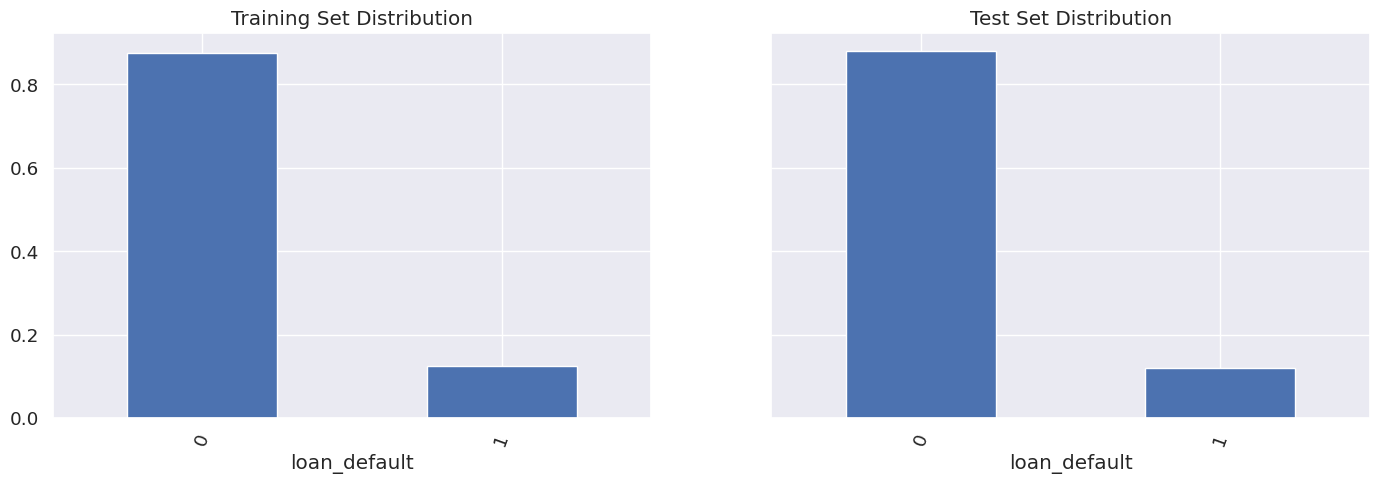

In [46]:
# First we check to confirm there's a class imbalance in the target variable

def binary_balance(target_train, target_test, plot_dist=True):
    if plot_dist:
        fig, axs = plt.subplots(ncols=2, figsize=(17, 5), sharey=True)

        target_train.value_counts(normalize = True).plot(kind="bar", ax=axs[0])
        axs[0].set_title("Training Set Distribution")
        axs[0].set_xticklabels(target_train.unique(),rotation=70)

        target_test.value_counts(normalize=True).plot(kind="bar", ax=axs[1])
        axs[1].set_title("Test Set Distribution")
        axs[1].set_xticklabels(target_test.unique(), rotation=70)
        plt.show()
    else:
      pass

sns.set(font_scale=1.2)

binary_balance(y_train, y_test, plot_dist=True)

The graph shows there's a strong imbalance against the minority value (loans being rejected), so to try and improve the model's performance I generated some synthetic records using SMOTE, which would help simulate more 'TRUE' scenarios (in this case loans that should be rejected) by generating new synthetic entries with similar characteristics to those already-existing TRUE entries. By having more instances of 'TRUE' records within the training dataset, this should assist the model in learning from more 'TRUE' instances and make more accurate predictions as a result. An important point to note is that I only created more synthetic TRUE records within the training dataset, as I wanted the test set to remain representative of the real world ratios as if the model was deployed into production, those would be the levels of split between the results it would actually see:

In [47]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_O, y_train_O = oversample.fit_resample(X_train, y_train)

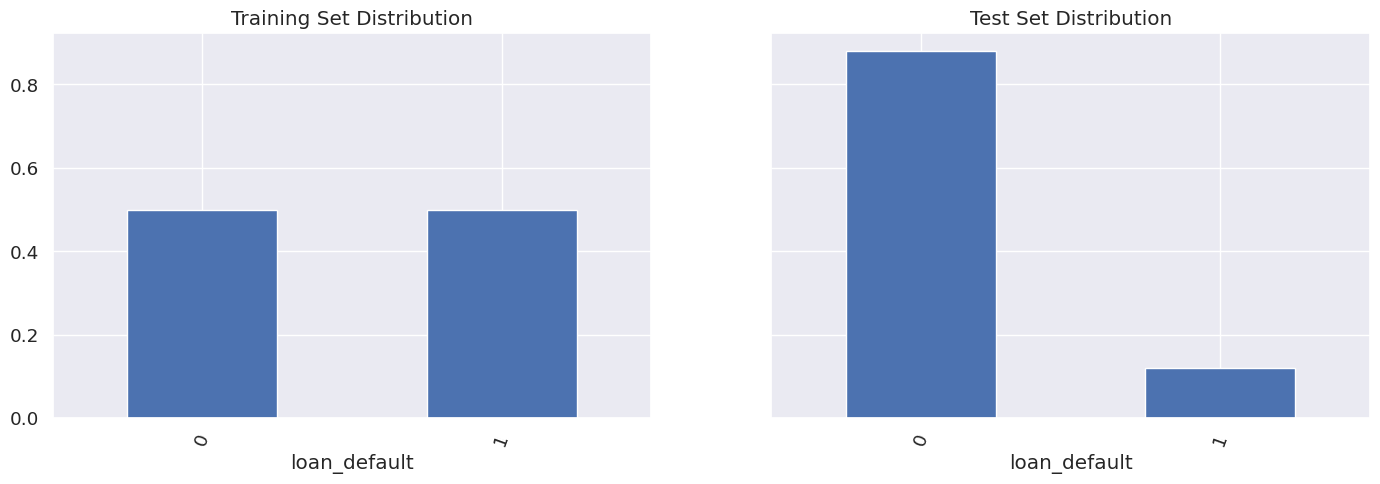

In [48]:
#Check the new distributions

def binary_balance(target_train, target_test, plot_dist=True):
    if plot_dist:
        fig, axs = plt.subplots(ncols=2, figsize=(17, 5), sharey=True)

        target_train.value_counts(normalize = True).plot(kind="bar", ax=axs[0])
        axs[0].set_title("Training Set Distribution")
        axs[0].set_xticklabels(target_train.unique(),rotation=70)

        target_test.value_counts(normalize=True).plot(kind="bar", ax=axs[1])
        axs[1].set_title("Test Set Distribution")
        axs[1].set_xticklabels(target_test.unique(), rotation=70)
        plt.show()
    else:
      pass

sns.set(font_scale=1.2)

binary_balance(y_train_O, y_test, plot_dist=True)

The above graphs show that the split of values is equally balanced in the training set, however the test set has been left in its original ratio. With this altered test set, I ran the data through the same Random Forest machine learning model as before:

In [49]:
# Set up the Random Forest Classifier model with SMOTE data

RFC = RandomForestClassifier()
RFC.fit(X_train_O, y_train_O)
y_pred_RFC_O = RFC.predict(X_test)

# Calculate the performance metrics

y_prob_RFC_O = RFC.predict_proba(X_test)

RFC_acc_O = sklearn.metrics.accuracy_score(y_test, y_pred_RFC_O) * 100
RFC_logloss_O = sklearn.metrics.log_loss(y_test, y_prob_RFC_O)
RFC_MSE_O = sklearn.metrics.mean_squared_error(y_test, y_pred_RFC_O)
RFC_RMSE_O = np.sqrt(RFC_MSE_O)
RFC_precision_O = precision_score(y_test, y_pred_RFC_O)
RFC_recall_O = recall_score(y_test, y_pred_RFC_O)
RFC_f1_O = f1_score(y_test, y_pred_RFC_O)

# Set up the Random Forest Dataframe

df_RFC_O = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_RFC_O})
df_RFC_O['Predicted'] = df_RFC_O['Predicted'].astype(int)
RFC_results_O=["True Negative","False Positive","False Negative","True Positive"]

df_RFC_O=df_RFC_O.groupby(["Actual", "Predicted"]).size().reset_index(name="Count")
df_RFC_O['Result'] = RFC_results_O
df_RFC_O = df_RFC_O[["Result","Actual","Predicted","Count"]]

# Set up the confusion matrix

cf_matrix_RFC_O = confusion_matrix(y_test, y_pred_RFC_O.round())
cmap_RFC_O = sns.color_palette("YlOrBr", as_cmap=True)

# Display the final results

print("-------------------------------------------------------------")
print("\033[4mMetrics\033[0m")
print("The Random Forest Classifier Model (Oversampled) has an accuracy of {}%".
      format(RFC_acc_O))
print("")
print("Log loss = {}".format(RFC_logloss_O))
print("Mean square error = {}".format(RFC_MSE_O))
print("Root mean square error = {}".format(RFC_RMSE_O))
print("Precision = {}".format(RFC_precision_O))
print("Recall = {}".format(RFC_recall_O))
print("F1 score = {}".format(RFC_f1_O))
print("-------------------------------------------------------------")
print("\033[4mActual v Predicted\033[0m")
print(df_RFC_O)

-------------------------------------------------------------
Metrics
The Random Forest Classifier Model (Oversampled) has an accuracy of 98.49872340425532%

Log loss = 0.06525369431122999
Mean square error = 0.015012765957446808
Root mean square error = 0.12252659285823142
Precision = 0.954093567251462
Recall = 0.9199323371863547
F1 score = 0.9367015932252045
-------------------------------------------------------------
Actual v Predicted
           Result  Actual  Predicted  Count
0   True Negative       0          0  25671
1  False Positive       0          1    157
2  False Negative       1          0    284
3   True Positive       1          1   3263


## Part 4: Critical Model Evaluation

#### *i. Accuracy Metrics*

As this was a classification problem, I used a confusion matrix as my primary accuracy metric due to its strengths in being able to consider all combinations of predictions (positive value-positive prediction, positive value-negative prediction, negative value-positive prediction and negative value-negative prediction) when assessing how the model is performing. This is really powerful as if a model is underperforming on a specific quadrant of the matrix (e.g. positive value-negative prediction), you can see that quickly and effectively through the visualisation below and know that's where effort needs to be spent in improving its performance on those types of records. In this scenario I built a dataframe out of the different types of prediction results and visualised them all for an easy comparison:

In [50]:
# Number of correct classifications

LR_right = (df_LR['Count'][0]+df_LR['Count'][3]).astype(str)
RFC_right = (df_RFC['Count'][0]+df_RFC['Count'][3]).astype(str)
RFC_O_right = (df_RFC_O['Count'][0]+df_RFC_O['Count'][3]).astype(str)

# Number of incorrect classifications

LR_wrong = (df_LR['Count'][1]+df_LR['Count'][2]).astype(str)
RFC_wrong = (df_RFC['Count'][1]+df_RFC['Count'][2]).astype(str)
RFC_O_wrong = (df_RFC_O['Count'][1]+df_RFC_O['Count'][2]).astype(str)

#Number of true negative

LR_TN = (df_LR['Count'][0])
RFC_TN = (df_RFC['Count'][0])
RFC_O_TN = (df_RFC_O['Count'][0])

# Number of false positives

LR_FP = (df_LR['Count'][1])
RFC_FP = (df_RFC['Count'][1])
RFC_O_FP = (df_RFC_O['Count'][1])

# Number of false negatives

LR_FN = (df_LR['Count'][2])
RFC_FN = (df_RFC['Count'][2])
RFC_O_FN = (df_RFC_O['Count'][2])

# Number of true positive

LR_TP = (df_LR['Count'][3])
RFC_TP = (df_RFC['Count'][3])
RFC_O_TP = (df_RFC_O['Count'][3])

# Create comparison table

comp_data = {'Logistic Regression Model' : [LR_right, LR_wrong, LR_TN, LR_FP, LR_FN, LR_TP],
             'Random Forest Model' : [RFC_right, RFC_wrong, RFC_TN, RFC_FP, RFC_FN, RFC_TP],
             'Random Forest Oversampled Model' : [RFC_O_right, RFC_O_wrong, RFC_O_TN, RFC_O_FP, RFC_O_FN, RFC_O_TP]}

df_comp = pd.DataFrame(comp_data)
df_comp = df_comp.rename(index={0 : 'Total Correct',
                                1 : 'Total Incorrect',
                                2 : 'True Negatives',
                                3 : 'False Positives',
                                4 : 'False Negatives',
                                5 : 'True Positives'})

df_comp = df_comp.T
df_comp = df_comp.apply(pd.to_numeric)
df_comp

,Total Correct,Total Incorrect,True Negatives,False Positives,False Negatives,True Positives
Logistic Regression Model,28480,895,25526,302,593,2954
Random Forest Model,28920,455,25736,92,363,3184
Random Forest Oversampled Model,28934,441,25671,157,284,3263


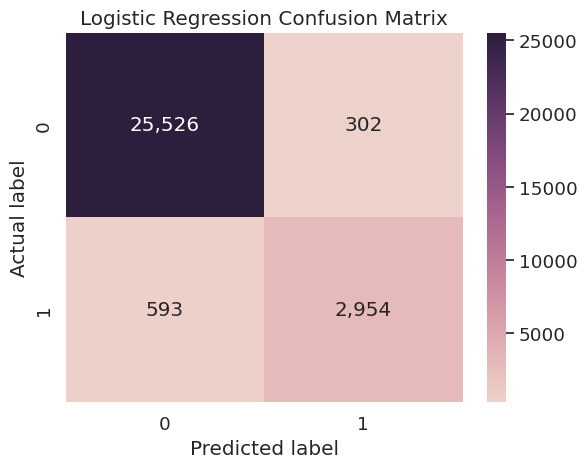

In [51]:
# Logistic Regression visualised confusion matrix

sns.heatmap(cf_matrix_LR, annot=True,
            fmt='0,', cmap=cmap_LR)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label');

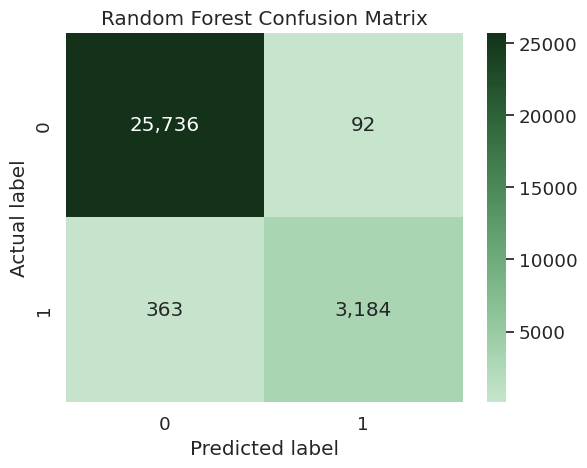

In [52]:
# Random Forest visualised confusion matrix

sns.heatmap(cf_matrix_RFC, annot=True,
            fmt='0,', cmap=cmap_RFC)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label');

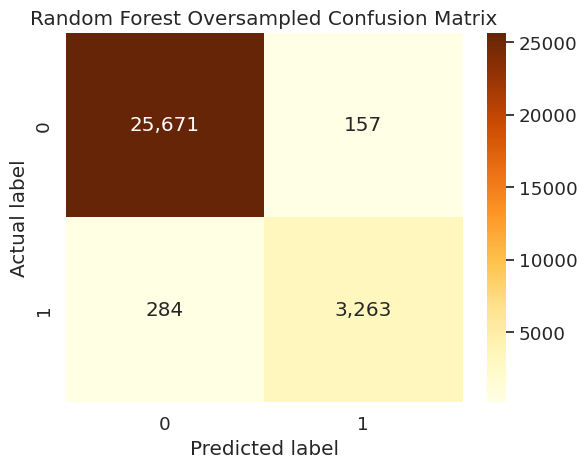

In [53]:
# Random Forest Oversampled visualised confusion matrix

sns.heatmap(cf_matrix_RFC_O, annot=True,
            fmt='0,', cmap=cmap_RFC_O)
plt.title('Random Forest Oversampled Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label');

Using the data from the confusion matrix, a couple of interesting discussion points emerge. It could be argued that the Oversampled model (that used SMOTE to create the extra 'TRUE' synthetic records) has performed the most positively as it has made the highest amount of correct predictions, surpassing the baseline Logistic Regression and initial Random Forest models. This means that using the test data, this model predicted the highest amount of correct predictions (both true positives and true negatives) and therefore it can be seen as the 'best' performing model of the 3.

However, another interpretation could be that the initial Random Forest model performed most positively with regards to it having the smallest number of false positives. In this scenario, this would be the amount of times a loan is flagged as rejected when it shouldn't be, and by having the smallest amount it means that this model limits the amount of potential lost business that could be incurred due to this incorrect prediction. Therefore, if the businesses' main aim is to minimise losses through this scenario, this model could be deemed the most successful.

Ultimately it depends on what the businesses' aims and objectives are, as to how the best performing variant of a machine learning model is determined.

#### *ii. Loss Function*

My chosen loss function that I used to evaluate the models was the F1 score. The F1 score combines precision (the amount of positive predictions made by the model that were correct) and recall (the amount of positive class samples in the dataset that were correctly identified by the model) by using their harmonic mean. The F1 score ranges between 0 and 1 and a higher F1 score generally indicates a more positive performance.

This is appropriate for this scenario as both the precision and recall values are calculated from values established in the confusion matrix in the previous section, building on their evaluation of each models performance. Also, the F1 score is great to use on imbalanced datasets such as this scenario as its able to acknowledge and create a representative value irrespective of the imbalance due to how its calculated using the precision/recall values.

Similar to Part 4 Section 1, I collated the calculated F1 scores into a dataframe and then visualised the results for clearer interpretation:

In [54]:
# Create comparison table

acc_data = {'Logistic Regression Model' : [LR_acc, LR_precision, LR_recall,LR_f1],
            'Random Forest Model' : [RFC_acc, RFC_precision, RFC_recall, RFC_f1],
            'Random Forest Oversampled Model' : [RFC_acc_O, RFC_precision_O, RFC_recall_O, RFC_f1_O]}

df_acc = pd.DataFrame(acc_data)
df_acc = df_acc.rename(index={0 : 'Accuracy',
                                1 : 'Precision',
                                2 : 'Recall',
                                3 : 'F1'})

df_acc = df_acc.T
df_acc= df_acc.apply(pd.to_numeric)
df_acc=df_acc.round(2)
df_acc

,Accuracy,Precision,Recall,F1
Logistic Regression Model,96.95,0.91,0.83,0.87
Random Forest Model,98.45,0.97,0.90,0.93
Random Forest Oversampled Model,98.50,0.95,0.92,0.94


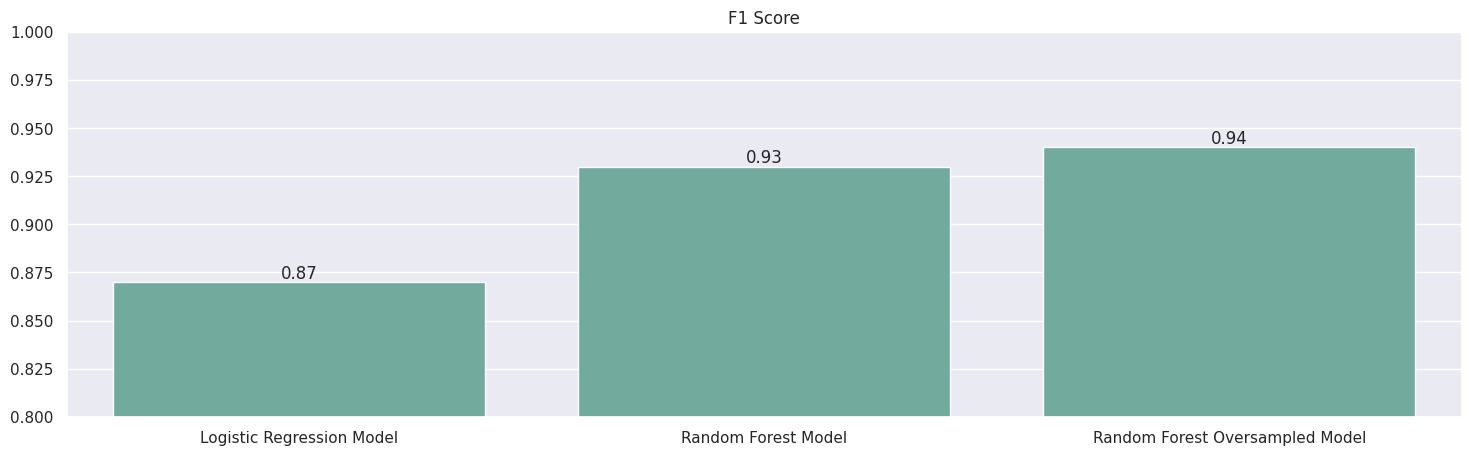

In [56]:
# Set up F1 dataframe

df_acc_f1 = df_acc[['F1']]
df_acc_f1  = pd.DataFrame(df_acc_f1)
df_acc_f1 = df_acc_f1.T
df_acc_f1 = df_acc_f1.round(2)

min_SFK_f1 = df_acc['F1'].min()-2

# Create F1 bar chart

sns.set(style="darkgrid")

ax = sns.barplot(
    data=df_acc_f1, estimator=sum, errorbar=None, color='#69b3a2')
plt.title("F1 Score")
ax.figure.set_size_inches(18,5)
x1,x2,y1,y2 = ax.axis()
ax.axis((x1,x2,0.8,1))
for i in ax.containers:
    ax.bar_label(i,);

The results here are slightly more conclusive than the confusion matrix: the Oversampled Random Forest model has the highest accuracy, recall and F1 scores than the other models, demonstrating superior performance on this dataset and features compared to the other two models when predicting loan statuses.

One point of interest is around the slightly lower precision score for the Oversampled model vs the initial Random Forest, however when viewed alongside the accuracy metrics this ties up as the precision score looks at the proportion of true positive predictions within all predictions that are labelled as positive, with the aim of minimizing false positives. We saw in the previous section that the initial Random Forest was able to make a smaller number of false positive predictions than the Oversampled model and therefore it makes sense that the precision scores of both models reflect this.

Using both the accuracy metrics and loss functions to evaluate the 3 models proposed in this report, I would recommend LendingClub use the Oversampled Random Forest model should they want to productionise the predictions of whether loan applications should be approved or rejected, based on the data they've previously collected and their current portfolio of loan statuses and related features. This recommendation is grounded on its total amount of correct predictions and its strong F1 score vs the other two models.

## Part 5: Business Report

### *i. Methodology, approach, and model selection rationale*

The methodology for this report was split into distinct parts. In Part 1, I aimed to conduct a thorough preparation & cleaning phase by removing as little as possible and cleaning/enhancing the data as much as possible, with the aim of keeping as much information for the upcoming analysis and eventual machine learning. I believed this would give me ample routes to choose when exploring the data and also provide a wide range of features to choose from when implementing reduction techniques, and by keeping the maximum amount of data and elevating it's quality, I aimed to make better decisions in each subsequent stage as a result.

For Part 2, I aimed for the EDA to cover different feature areas and create new features that could complement or improve upon the data that was already there. I found this to be a cyclical process of reviewing the distribution & symmetry of the features, trialling new features within the feature engineering section and then creating visuals to see whether the new features provided any insight or not. With regards to handling outliers, I wanted to use a tried and tested methodology which is why I went with the z-score approach and for the feature reduction section, I wanted to use a combination of different approaches to demonstrate there are multiple viable ways to approach feature reduction.

Firstly, I wanted a manual but logical approach in removing features I thought would unfairly give an advantage to the machine learning models later on, based on their description in the data dictionary. Secondly, with the numerical features I wanted to demonstrate a mathematical approach which is why I implemented a reduction function based on the % amount of null values. Lastly, with the non-numerical features I aimed to highlight that supporting data information such as the data dictionary can be really useful and important when choosing which features to take forward.

With Part 3, the methodology was to encode the data in the most optimal and appropriate way in a structure that could be reused, should the code need to be productionised and reapplied onto a more up-to-date version of the dataset. I used both one hot and label encoding on the different non-numerical features to ensure I was retaining the original data in the most appropriate format for the upcoming algorithms to learn from and similarly with standardising, I chose to do this as there were different numeric data types on different scales and for the machine learning algorithms to learn most optimally, all the values needed to be on the same scale.

I approached the model selection with the aim of firstly setting a benchmark with a well-established, easily-interpretable and explainable model which is why I chose the logistic regression algorithm. Its effectiveness has been well documented and its application on classification problems has also been thoroughly explored, so it seemed and appropriate algorithm to use to set a baseline for this scenario. With regards to my main chosen algorith, the Random Forest, as mentioned in the main notebook I chose it for its efficiency, explainability and robustness to overfitting and noise.

In Part 4, I wanted to ensure I chose both accuracy and loss metrics that were appropriate for the type of problem in this scenario. Due to it being a classification problem, both the confusion matrix and the F1 scores were appropriate metrics due to their interpretations of the binary classification predictions. A metric such as the root mean square error wouldn't have been applicable here as that is much more useful in a regression problem, where the model can be evaluated on how far away numerically its prediction is vs the actual value, whereas in the classification problem presented in this scenario there are only two possible prediction values (approved (0) or rejected (1)).

### *ii. Advantages and limitations of the chosen model*

One of the main advantages of using the Random Forest model in this scenario was its ability to achieve high accuracy due to how it functions. As it uses several decision trees, with each tree training on a unique subset of data, the Random Forest model aggregates their predictions and subsequently lessens the variation that can be associated with individual trees, resulting in more accurate average predictions. This was important in this scenario as there could be costs incurred such as lost business for making incorrect predictions and the Random Forest innately helps improve the odds in this respect.

Another advantage was the Random Forest's resistance to noise vs some other machine learning models. This is because since it uses a combination of predictions and takes the average, noisy data points are unlikely to affect the outcome of every tree in the forest and therefore have less of a chance to affect the performance of the overall model. It was important in this scenario as I believe I retained quite a large amount of features and therefore its likely there could have been a bit of noise within the dataset vs a potentially smaller dataset with less features, so I wanted the Random Forest to help with that as much as possible.

One key limitation of the recommended Random Forest model was the lack of interpretability. Whilst the Random Forest has in theory a more explainable structure, the interpretability of how it reaches its end predictions by tracing back through the individual branches, trees etc. can be complicated. Also trying to identify which relationships between features and the effect each has on the overall predictions can be hard to convey as well, which is important in this scenario as its focused on an industry that is heavily regulated and any decisions such as whether to lend an individual money or not needs to be easily explainable to external auditors. The Random Forest presents a problem here as its predictions aren't easily dissected and needs to be carefully considered when deciding on whether to put an algorithm like this into production.

Another limitation of the Random Forest model was it can suffer from overfitting and it doesn't have too many hyperparameters to counteract this. Due to its relatively straight-forward structure compared to a model such as neural network, the Random Forest only has 6 hyperparameters and it captures a lot of information in its training data, which sometimes leads to poor generalisation when used on unseen data. If it starts overfitting, there aren't too many hyperparameters than can be used to alter the models structure and therefore I decided to focus more on the oversampling of the training data in this report as I thought it could have a potentially more impactful result on the end predictions, rather than the limited hyperparameter tuning.

### *iii. Architecture of the final solution*

The final solution (the full Python notebook) comprised of 4 main parts with sub chapters (and some sub-sub chapters) in each, in order to form a workflow that took the original CSV dataset into Python, prepared and cleaned it, explored it, modelled it and evaluated it alongside markdown text explaining each action and code comments to expand where necessary. This architecture can be seen in the table of contents and the labelled headings.

With regards to the architecture of the final model, this was a Random Forest model that used oversampled training data to learn from and then test on 30% of the loaded records. The model was evaluated with a confusion matrix and F1 score and critiqued appropriately, with full explanations and justifications included in parts 3 and 4.

### *iv. Considerations on deployment and scalability of the solution*

There are a few considerations with regards to deployment and the scalability of the proposed final solution.

Firstly regarding deployment, it's recommended that the core code for the preparation pipeline, EDA, modelling and evaluation is all stored in a GIT repository. This would allow multiple members of a team to access the code and work on developing/expanding/updating different parts of the solution in separate development branches without affecting the main model in use.

A GIT repository also provides a comprehensive audit history of any changes made and by who, which should help with one of the models limitations in its interpretability as should any auditors ask to see what changes have been made to the model, they can easily be presented.

With regards to scalability, choosing a strong infrastructure is key to ensure its potential growth won't be impeded by technical restrictions. This can relate to the type of interface the model is being accessed through, such as a PyCharm app, but also the cloud infrastructure that the model could potentially be deployed to. Technical mechanisms such as API calls, server hosting and upkeep costs must be considered alongside the potential amount of users expected to use the final solution and how often they could be running predictions to output results.

Therefore to assist with scalability, its recommended the business considers creating systematic diagrams using platforms such as draw.io to identify who the main stakeholders are going to be, what the deployment architecture could look like and where could be areas of weakness or issues. By doing this and optimising the final solution as much as possible, it should lead to both an improved initial deployment and smoother future scalability.  

### *v. Estimated impact/ROI of the project*

The estimated impact/ROI of the project is primarily quantified through the amount of loans that are flagged to be rejected and the money it could save the organisation. It is not specified in the brief whether there is a cost of customers defaulting on their loans and how much this is, but by taking an estimate and using it alongside the final amount of true positive prediction results a machine learning model such as the one proposed in this report, an estimated savings figure can be estimated.

The Random Forest Oversampled model predicted 3,263 true positive results, aka loans that were flagged to be rejected. Without the model and if these loans had been approved and subsequently defaulted on, at an estimated cost to the business of say £5,000 for the average lost repayment values (which is half of the most common loan amount of £10,000 identified in the EDA section), along with potential other internal admin expenses etc., the business could have saved itself £16.3m in sunk costs over the 13 year period the dataset was collected in, averaging at just under £1m a year saving.

The net cost would be lower as it would have to take into account the money required to set up the data science team to build and monitor such a prediction model, the architecture costs and other associated costs with maintaining the solution, however the immediate monetary return could be well worth undertaking the project once a business case is fully put together and presented to the business for approval.